# Profiling titanic dataset

### import libraries

In [69]:
import pandas
import numpy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

cell multiple output

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### read the csv

In [71]:
titanic = pandas.read_csv('titanic.csv', on_bad_lines='skip')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### pandas data frame describe

In [72]:
pandas.DataFrame.describe(titanic)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### count elements in each column

In [73]:
pandas.DataFrame.count(titanic)


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Count of unique values

In [74]:
pandas.DataFrame.nunique(titanic)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [75]:
# pandas.DataFrame.value_counts(titanic)
titanic.Age.value_counts()
titanic.PassengerId.value_counts()
titanic.Survived.value_counts()
titanic.Pclass.value_counts()
titanic.Name.value_counts()
titanic.Sex.value_counts()
titanic.SibSp.value_counts()
titanic.Parch.value_counts()
titanic.Ticket.value_counts()
titanic.Fare.value_counts()
titanic.Cabin.value_counts()
titanic.Embarked.value_counts()



24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Histogram of distribution

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'Parch'}>]], dtype=object)

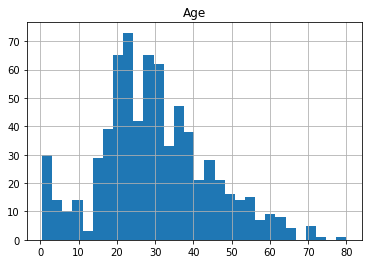

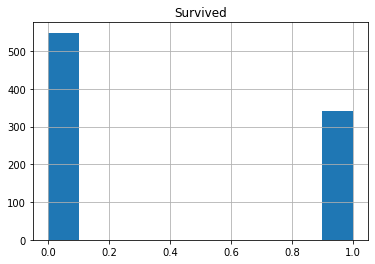

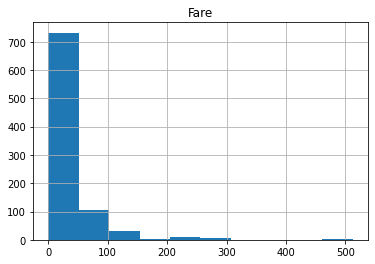

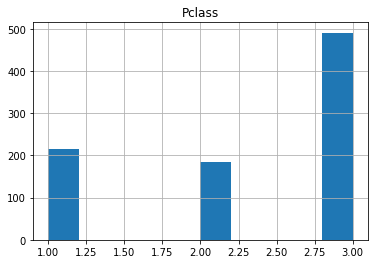

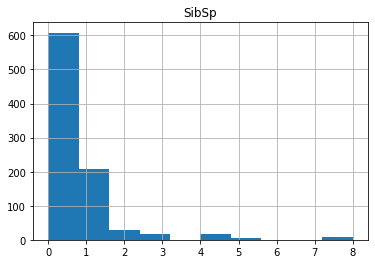

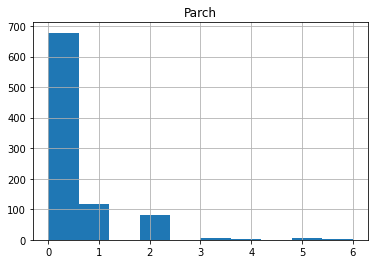

In [76]:
pandas.DataFrame.hist(titanic, column='Age', bins=30)
pandas.DataFrame.hist(titanic, column='Survived')
pandas.DataFrame.hist(titanic, column='Fare')
pandas.DataFrame.hist(titanic, column='Pclass')
pandas.DataFrame.hist(titanic, column='SibSp')
pandas.DataFrame.hist(titanic, column='Parch')




### Graficas de prueba

#### dataframe

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

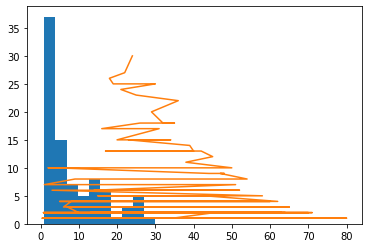

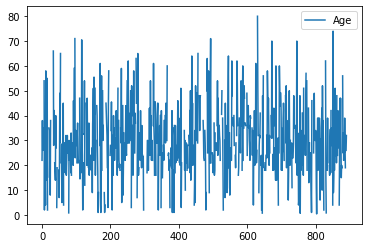

In [77]:

# sex = titanic.Sex.value_counts()
# sex
# sex.plot()

titanic.Age.value_counts().hist()
titanic.Age.value_counts().plot()


pandas.DataFrame(titanic['Age']).plot()

#### seaborn

<AxesSubplot:ylabel='Age'>

<AxesSubplot:ylabel='Age'>

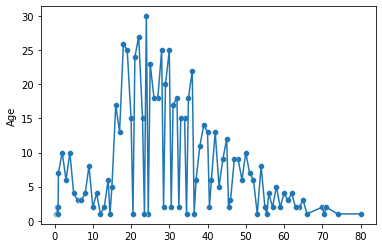

In [78]:

sns.lineplot( data=titanic.Age.value_counts())
sns.scatterplot( data=titanic.Age.value_counts())


male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

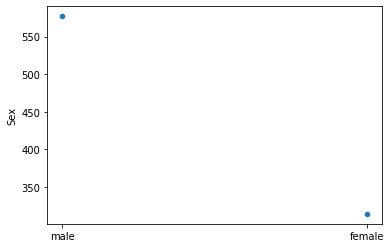

In [79]:
sex= titanic.Sex.value_counts()
sex
sns.scatterplot(data=sex)


3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Pclass'>

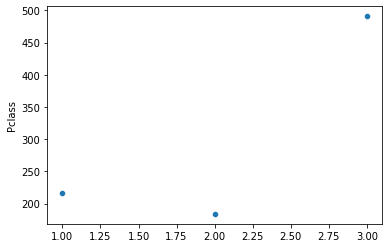

In [80]:
classes = titanic.Pclass.value_counts()
classes
sns.scatterplot( data=classes)


#### ploty

##### probing ploty

In [81]:

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

### Count null or empty values

In [82]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Common values

In [83]:
titanic.Age.duplicated()

pandas.DataFrame.duplicated(titanic, subset=['Age'])
titanic.Pclass.duplicated()
titanic.Name.duplicated()
titanic.Sex.duplicated()
titanic.Cabin.duplicated()


0      False
1      False
2      False
3      False
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Age, Length: 891, dtype: bool

0      False
1      False
2      False
3      False
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Length: 891, dtype: bool

0      False
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Pclass, Length: 891, dtype: bool

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

0      False
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Sex, Length: 891, dtype: bool

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

### numerical data

In [84]:
titanic2 = titanic[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]
print('mean')
titanic2.mean()
print('minimo')
titanic2.min()
print('max')
titanic2.max()
print('Outliers')



mean


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

minimo


PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

max


PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

Outliers


### categorical data


##### ploting age

In [85]:
age = titanic.Age.value_counts()
fig = px.bar(age)
fig.show()
fig = px.area(age)
fig.show()
fig = px.scatter(age)
fig.show()

##### sex 

In [86]:
sex = titanic.Sex.value_counts()
fig = px.bar(sex)
fig.show()
fig = px.area(sex)
fig.show()
fig = px.scatter(sex)
fig.show()

##### survived

In [87]:
survived = titanic.Survived.value_counts()
fig = px.bar(survived)
fig.show()
fig = px.area(survived)
fig.show()
fig = px.scatter(survived)
fig.show()

##### Pclas

In [88]:
classe = titanic.Pclass.value_counts()
fig = px.bar(classe)
fig.show()
fig = px.area(classe)
fig.show()
fig = px.scatter(classe)
fig.show()

##### sibSp

In [89]:
sib = titanic.SibSp.value_counts()
fig = px.bar(sib)
fig.show()
fig = px.area(sib)
fig.show()
fig = px.scatter(sib)
fig.show()

##### parch

In [90]:
parch = titanic.Parch.value_counts()
fig = px.bar(parch )
fig.show()
fig = px.area(parch )
fig.show()
fig = px.scatter(parch )
fig.show()

##### cabin

In [96]:
cabin = titanic_g.Cabin.value_counts()
cabin
fig = px.bar(cabin)
fig.show()
fig = px.area(cabin)
fig.show()
fig = px.scatter(cabin)
fig.show()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

##### embarked

In [92]:
emb = titanic.Embarked.value_counts()
fig = px.bar(emb)
fig.show()
fig = px.area(emb)
fig.show()
fig = px.scatter(emb)
fig.show()

### relation

In [93]:
titanic
titanic_g = titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare', 'Cabin', 'Embarked']]
titanic_g = titanic_g.fillna('N')

titanic_g = titanic_g.replace({'Cabin': r'^A.+'}, 'A', regex=True)
titanic_g = titanic_g.replace({'Cabin': r'^B.+'}, 'B', regex=True)
titanic_g = titanic_g.replace({'Cabin': r'^C.+'}, 'C', regex=True)
titanic_g = titanic_g.replace({'Cabin': r'^D.+'}, 'D', regex=True)
titanic_g = titanic_g.replace({'Cabin': r'^E.+'}, 'E', regex=True)
titanic_g = titanic_g.replace({'Cabin': r'^F.+'}, 'F', regex=True)
titanic_g = titanic_g.replace({'Cabin': r'^G.+'}, 'G', regex=True)
titanic_g


# titanic_g.Cabin.str.replace('^B[0-9]+', 'B', regex=True)
# titanic_g = titanic_g.Cabin.str.replace('^A[0-9]+', 'A', regex=True)
# titanic_g



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,N,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C,C


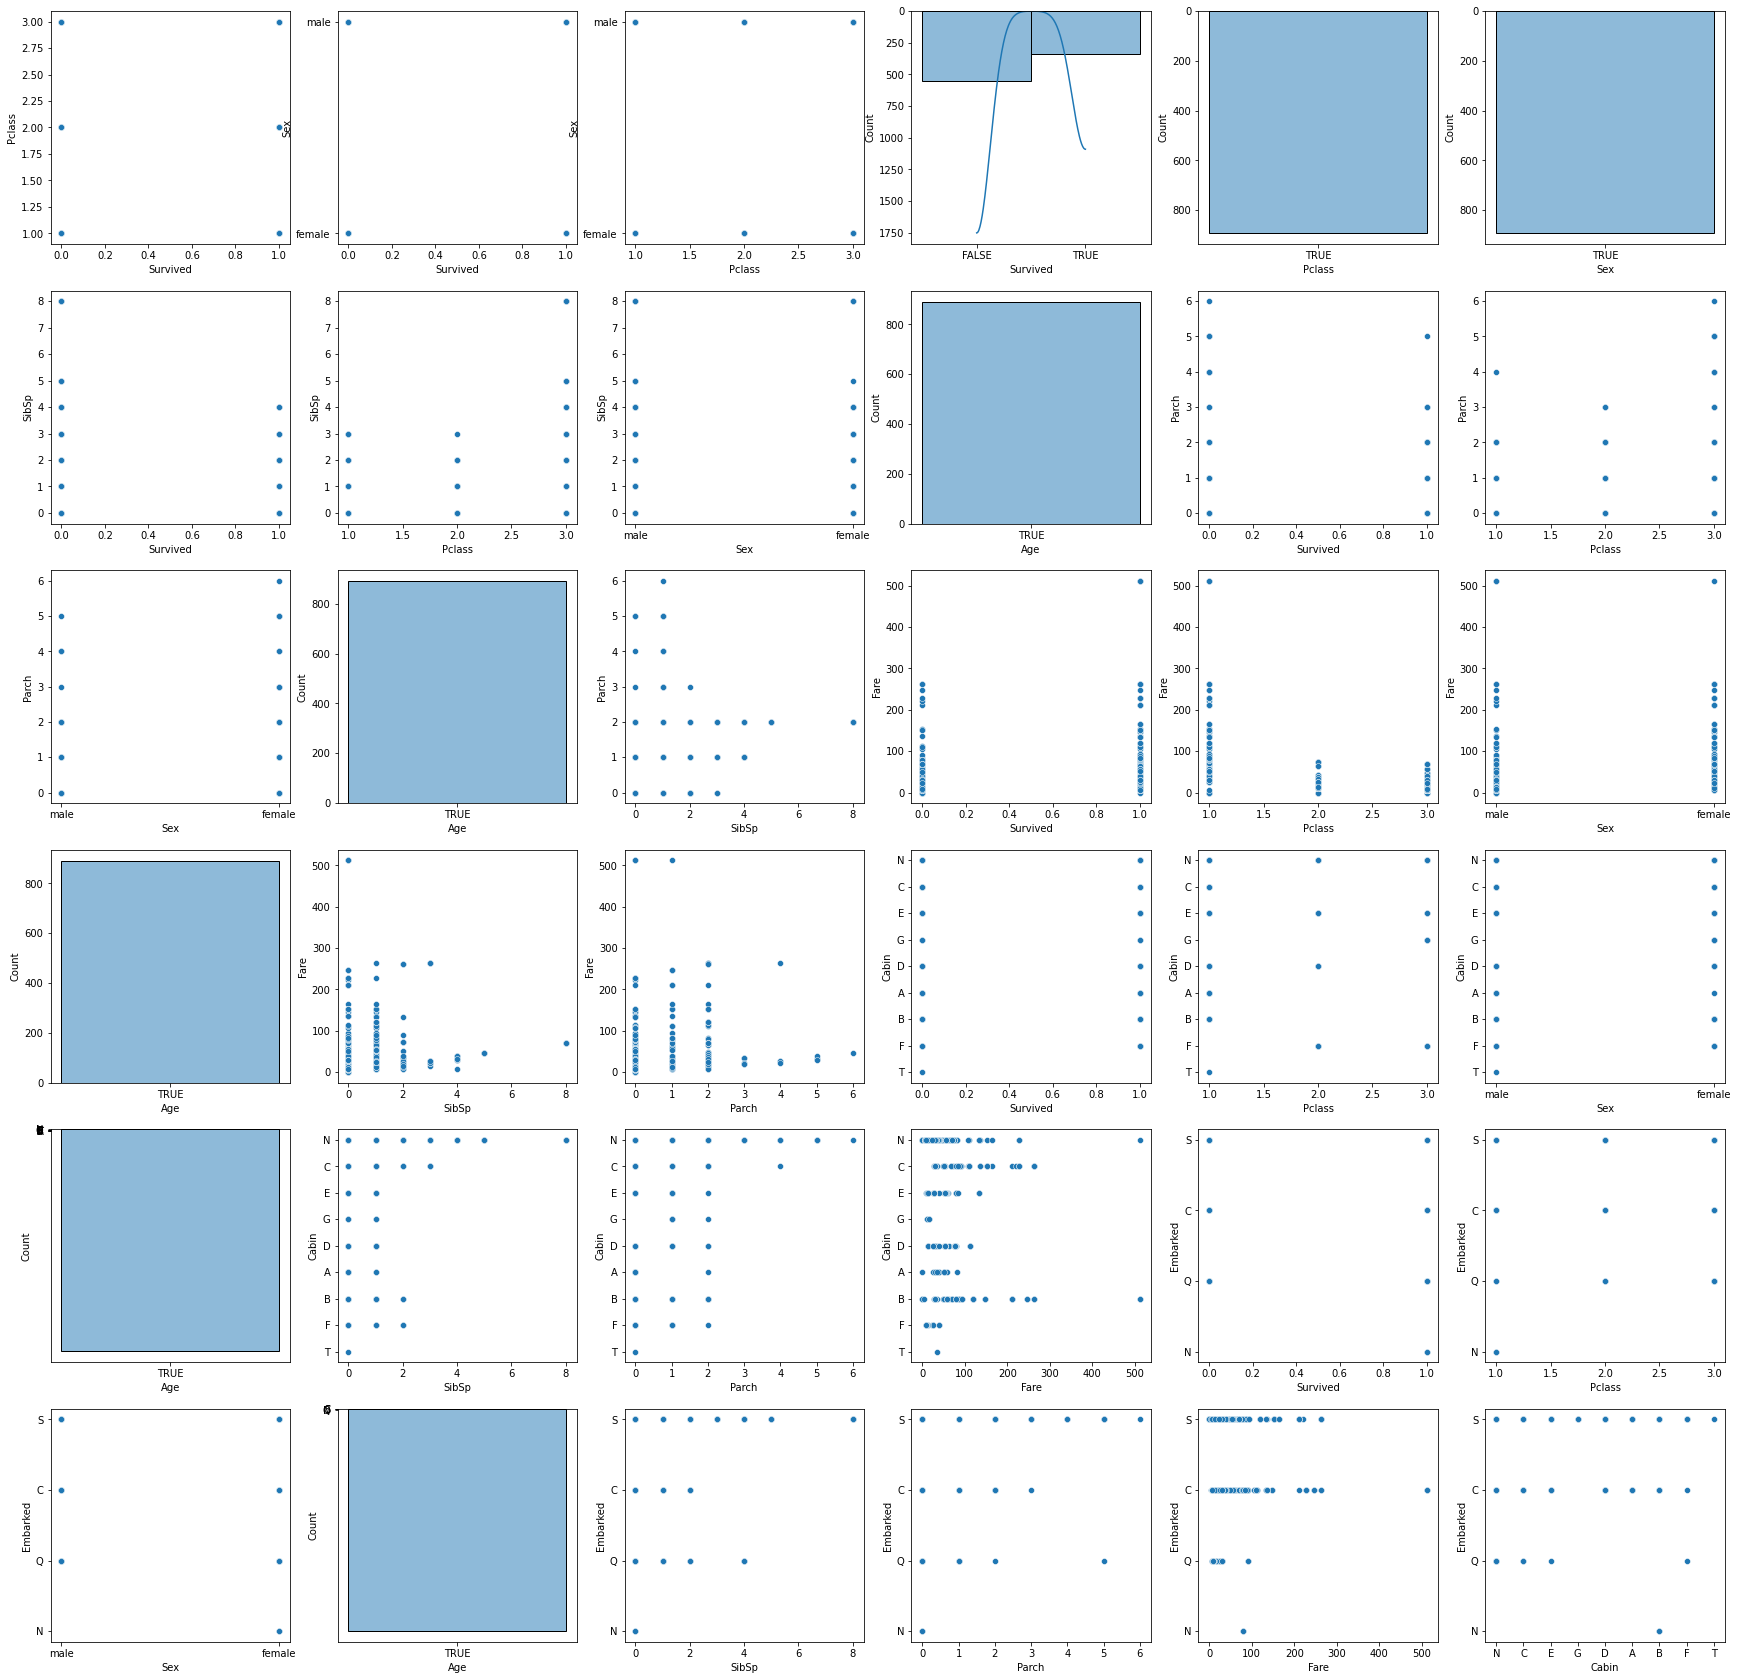

In [94]:



_=plt.subplots(6,6,figsize=(30,30))
a = 1
for j,c in enumerate(titanic_g):
    
    for i, column in enumerate(titanic_g.columns, 1):
        if j < i: 
            continue
        _=plt.subplot(6,6,a)
        try:
            _=sns.scatterplot(x=titanic_g[column], y = titanic_g[c])
        except: 
            # _=sns.histplot(titanic[column],discrete=True)
            _=sns.histplot(titanic[column].apply(lambda x: "TRUE" if x else "FALSE"),kde=True)
            # print(f"Column {column} not plotted")
            # i-=1

        a += 1 
        


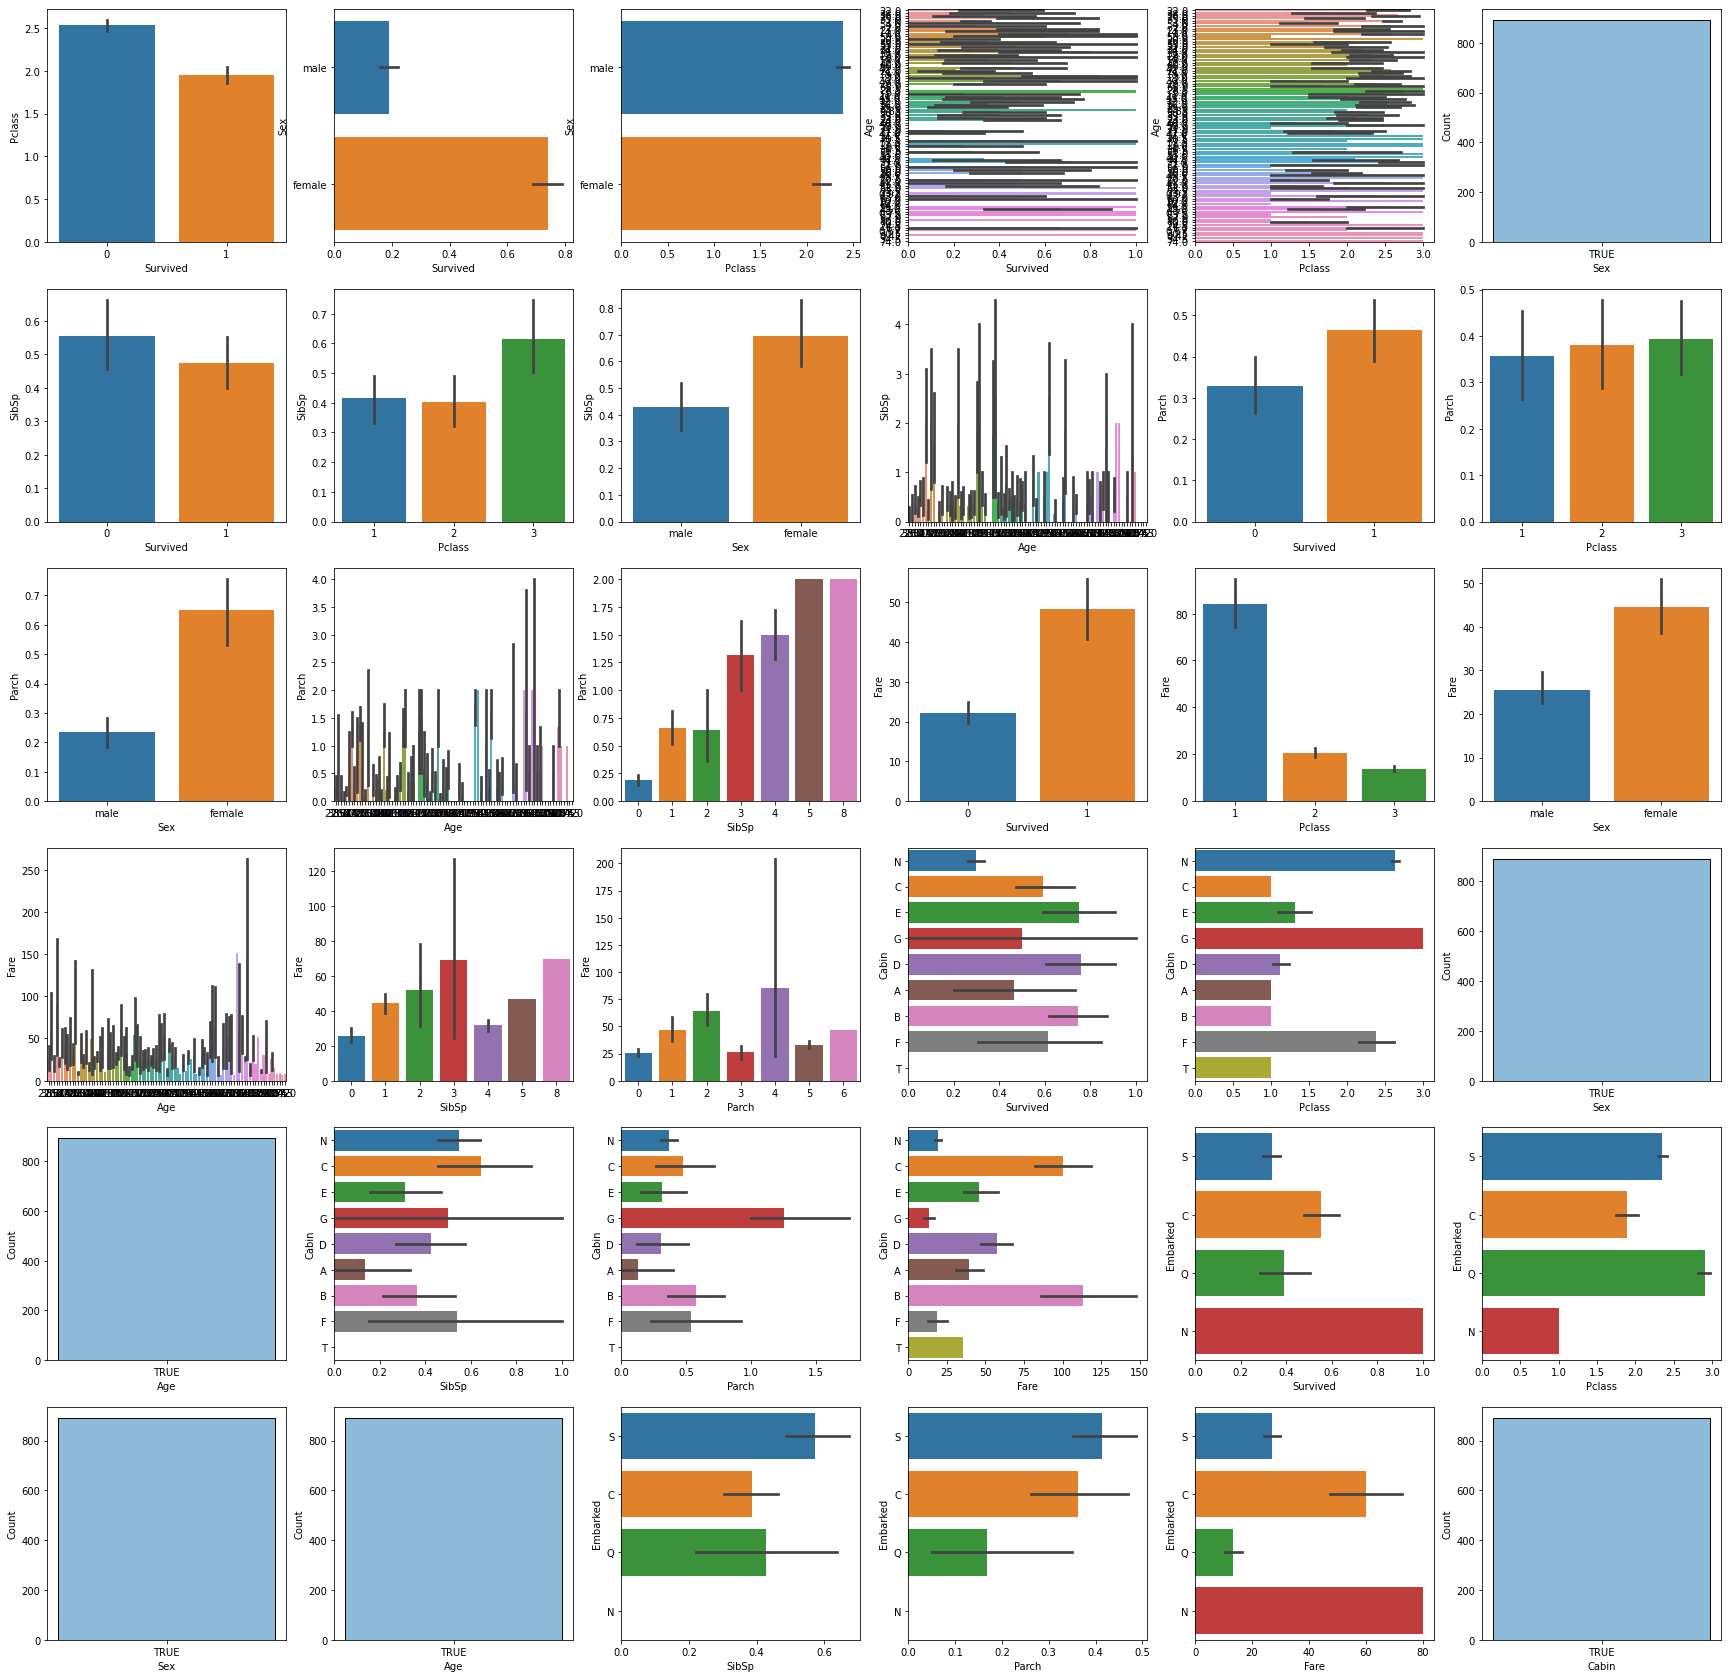

In [95]:
_=plt.subplots(6,6,figsize=(30,30))
a = 1
for j,c in enumerate(titanic_g):
    
    for i, column in enumerate(titanic_g.columns, 1):
        if j < i: 
            continue
        _=plt.subplot(6,6,a)
        try:
            _=sns.barplot(x=titanic_g[column], y = titanic_g[c])
        except: 
            # _=sns.histplot(titanic[column],discrete=True)
            _=sns.histplot(titanic[column].apply(lambda x: "TRUE" if x else "FALSE"),kde=True)
            # print(f"Column {column} not plotted")
            # i-=1

        a += 1 